# MobileNet: Efficient Convolutional Neural Networks for Mobile Vision Applications

[MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications](https://arxiv.org/abs/1704.04861)


이번에는 MobileNet의 핵심 개념을 이해하고, 이를 기반으로 TensorFlow와 PyTorch를 사용하여 구현해보겠습니다.

MobileNet은 모바일 및 임베디드 기기에서 효율적으로 딥러닝 모델을 사용할 수 있도록 설계된 경량화된 신경망입니다.

## 1. MobileNet 소개

## 1.1 MobileNet이란?

- MobileNet은 구글에서 제안한 경량화된 컨볼루션 신경망(CNN)으로, 모바일 및 임베디드 기기에서의 효율적인 컴퓨터 비전 애플리케이션을 위해 설계되었습니다.
- 모델의 크기와 연산량을 줄이면서도 정확도를 최대한 유지하는 것을 목표로 합니다.
- Depthwise Separable Convolution이라는 기법을 사용하여 연산량과 파라미터 수를 크게 감소시켰습니다.


### 1.2 MobileNet의 배경

- 딥러닝 모델의 정확도를 높이기 위해 일반적으로 모델의 깊이와 복잡도를 증가시켜야 합니다.
그러나

- 이러한 모델들은 모바일 및 임베디드 기기에서 실시간으로 실행하기에는 너무 무겁습니다.

- 따라서 모델의 경량화와 효율성을 높이기 위한 연구가 필요하게 되었습니다.

- MobileNet은 이러한 요구에 부응하여 경량화된 모델 구조를 제안하였습니다.

## 2. Depthwise Separable Convolution 이해

### 2.1 Depthwise Separable Convolution이란?

Depthwise Separable Convolution은 일반적인 합성곱 연산을 두 가지 단계로 분리한 것입니다.

1. Depthwise Convolution:
    - 각 입력 채널별로 하나의 필터를 적용합니다.
    - 즉, 입력 채널 수만큼의 필터를 사용하여 채널별로 독립적인 공간 필터링을 수행합니다.
    - 공간적인 특징을 추출하지만, 채널 간의 정보는 학습하지 않습니다.

2. Pointwise Convolution
    - 1x1 합성곱을 사용하여 Depthwise Convolution의 출력을 결합하고, 채널 간 정보를 통합합니다.
    - 원하는 출력 채널 수로 변환합니다.

<img src="https://www.researchgate.net/publication/357973065/figure/fig2/AS:1127438167879680@1645813614280/Depthwise-separable-convolution-of-the-MobileNet-which-factorizes-the-convolution-into.ppm">

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*xxhZrJBY23Px3nbAJiFanQ.png">

### 2.2 장점

- 연산량 감소
    - 일반적인 합성곱에 비해 연산량과 파라미터 수를 크게 줄일 수 있습니다.
    - 일반 합성곱 대비 약 8~9배의 연산량 감소를 가져옵니다.

- 성능 유지
    - 연산량 감소에도 불구하고 모델의 정확도를 크게 떨어뜨리지 않습니다.

- 모델 경량화
    - 모바일 및 임베디드 기기에서 효율적으로 사용할 수 있습니다.

## 3. MobileNet의 주요 특징

### 3.1 핵심 아이디어

- Depthwise Separable Convolution을 모든 합성곱 계층에 적용하여 모델의 연산량과 파라미터 수를 감소시킵니다.

- 각 Depthwise 및 Pointwise 합성곱 뒤에 Batch Normalization과 ReLU6 활성화 함수를 적용하여 학습의 효율성과 안정성을 높입니다.

- ReLU6
    - 일반적인 ReLU 함수와 유사하지만, 출력 값을 0에서 6 사이로 제한합니다.
    - 저정밀 하드웨어에서의 계산을 안정화하고, 큰 값으로 인한 과적합을 방지합니다.

### 3.2 모델 구조

- MobileNet은 총 28개의 계층으로 구성되어 있으며, 대부분이 Depthwise Separable Convolution으로 이루어져 있습니다.
- 초기에는 일반적인 합성곱 계층을 사용하여 입력 데이터를 처리하고, 이후 Depthwise Separable Convolution 블록들을 쌓아 모델을 구성합니다.
- Global Average Pooling과 Fully Connected Layer를 통해 최종 분류를 수행합니다.

### 하이퍼파라미터

MobileNet은 모델의 크기와 연산량을 조절하기 위한 두 가지 하이퍼파라미터를 도입했습니다.

1. Width Multiplier (α)

    - 네트워크의 폭(채널 수)을 조절합니다.
    - 모든 계층의 채널 수에 α를 곱하여 모델의 너비를 줄입니다.
    - α 값은 (0, 1] 범위이며, 일반적으로 1, 0.75, 0.5, 0.25로 설정됩니다.
    - α를 줄이면 연산량과 파라미터 수가 약 α²배 감소합니다.

2. Resolution Multiplier (ρ)

    - 입력 이미지의 해상도를 조절합니다.
    - 모든 계층의 특성 맵 크기에 ρ를 곱하여 모델의 해상도를 줄입니다.
    - ρ 값은 (0, 1] 범위이며, 일반적으로 1, 0.75, 0.5, 0.25로 설정됩니다.
    - ρ를 줄이면 연산량이 약 ρ²배 감소합니다.

## 4. TensorFlow를 사용한 MobileNet 구현

### 4.1 필요한 라이브러리 Import

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import (Conv2D, DepthwiseConv2D, BatchNormalization,
                                     ReLU, GlobalAveragePooling2D, Dense, Input)
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

### 4.2 Depthwise Separable Convolution 구현

In [ ]:
def depthwise_separable_conv_block(x, pointwise_filters, strides=(1,1)):
    # Depthwise Convolution
    x = DepthwiseConv2D(kernel_size=(3, 3), strides=strides, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU(6.)(x)  # ReLU6 활성화 함수 적용

    # Pointwise Convolution
    x = Conv2D(filters=pointwise_filters, kernel_size=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU(6.)(x)

    return x

- DepthwiseConv2D를 사용하여 Depthwise Convolution을 수행합니다.

- BatchNormalization과 ReLU6 활성화 함수를 적용하여 학습 안정성을 높입니다.

- Conv2D로 Pointwise Convolution을 수행하여 채널 간 정보를 통합합니다.

- ReLU6 활성화 함수를 사용하는 이유

    - ReLU6는 일반적인 ReLU와 달리 출력 값의 상한을 6으로 제한합니다.
    - 이는 저정밀 하드웨어에서 계산을 안정화하고, 큰 값으로 인한 과적합을 방지하는 효과가 있습니다.
    - 모바일 기기에서의 효율적인 연산을 위해 설계되었습니다.


### 4.3 전체 모델 구성

In [ ]:
def build_mobilenet(input_shape=(224, 224, 3), classes=1000):
    img_input = Input(shape=input_shape)

    # 초기 Conv 레이어
    x = Conv2D(32, (3,3), padding='same', strides=(2,2), use_bias=False)(img_input)
    x = BatchNormalization()(x)
    x = ReLU(6.)(x)

    # Depthwise Separable Convolution 블록들
    x = depthwise_separable_conv_block(x, 64, strides=(1,1))
    x = depthwise_separable_conv_block(x, 128, strides=(2,2))
    x = depthwise_separable_conv_block(x, 128, strides=(1,1))
    x = depthwise_separable_conv_block(x, 256, strides=(2,2))
    x = depthwise_separable_conv_block(x, 256, strides=(1,1))
    x = depthwise_separable_conv_block(x, 512, strides=(2,2))

    # 반복 블록
    for _ in range(5):
        x = depthwise_separable_conv_block(x, 512, strides=(1,1))

    x = depthwise_separable_conv_block(x, 1024, strides=(2,2))
    x = depthwise_separable_conv_block(x, 1024, strides=(1,1))

    # 분류 작업
    x = GlobalAveragePooling2D()(x)
    x = Dense(classes, activation='softmax')(x)

    model = Model(img_input, x, name='mobilenet')

    return model

# 모델 생성
mobilenet = build_mobilenet()

- build_mobilenet 함수는 MobileNet 모델을 구성합니다.

- 초기 Conv 레이어
    - 일반적인 합성곱 계층으로, 입력 이미지의 특징을 추출하고 크기를 줄입니다.

- Depthwise Separable Convolution 블록들
    - 여러 개의 블록을 쌓아 모델의 깊이를 증가시킵니다.
    - 일부 블록은 스트라이드 2를 사용하여 특성 맵의 크기를 줄입니다.

- Global Average Pooling
    - 특성 맵의 공간 차원을 평균화하여 1차원 벡터로 변환합니다.

- Dense 레이어
    - softmax 활성화 함수를 사용하여 최종 분류를 수행합니다.


### 4.4 모델 요약

In [ ]:
mobilenet.summary()

Model: "mobilenet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d (DepthwiseConv2D)   │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_1 (DepthwiseConv2D) │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_2 (DepthwiseConv2D) │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

- MobileNet은 약 4백만 개의 파라미터를 가지고 있습니다.
- 즉, 일반적인 대형 모델에 비해 파라미터 수가 매우 적어 경량화된 모델임을 알 수 있습니다.

## 5. PyTorch를 사용한 MobileNet 구현


## 5.1 필요한 라이브러리 Import

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### 5.2 Depthwise Separable Convolution 구현

In [ ]:
class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        # Depthwise Convolution
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=stride,
                                   padding=1, groups=in_channels, bias=False)
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.relu1 = nn.ReLU6(inplace=True)
        # Pointwise Convolution
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu2 = nn.ReLU6(inplace=True)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pointwise(x)
        x = self.bn2(x)
        x = self.relu2(x)
        return x

- groups=in_channels를 설정하여 Depthwise Convolution을 수행합니다.
    - 입력 채널 수만큼의 그룹으로 나누어 각 채널별로 독립적인 합성곱을 수행합니다.
- Pointwise Convolution으로 채널 수를 조정하고, 채널 간 정보를 통합합니다.
- 각 합성곱 뒤에 Batch Normalization과 ReLU6 활성화 함수를 적용합니다.

### 5.3 전체 모델 구성

In [ ]:
class MobileNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(MobileNet, self).__init__()
        def conv_bn_relu6(in_channels, out_channels, stride):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
                nn.BatchNorm2d(out_channels),
                nn.ReLU6(inplace=True)
            )

        self.model = nn.Sequential(
            conv_bn_relu6(3, 32, 2),
            DepthwiseSeparableConv(32, 64, 1),
            DepthwiseSeparableConv(64, 128, 2),
            DepthwiseSeparableConv(128, 128, 1),
            DepthwiseSeparableConv(128, 256, 2),
            DepthwiseSeparableConv(256, 256, 1),
            DepthwiseSeparableConv(256, 512, 2),
            *[DepthwiseSeparableConv(512, 512, 1) for _ in range(5)],
            DepthwiseSeparableConv(512, 1024, 2),
            DepthwiseSeparableConv(1024, 1024, 1),
            nn.AdaptiveAvgPool2d(1)
        )
        self.fc = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.model(x)
        x = x.view(-1, 1024)
        x = self.fc(x)
        return x

# 모델 생성
mobilenet = MobileNet()

- MobileNet 클래스는 MobileNet 모델을 구현합니다.
- conv_bn_relu6 함수는 초기 합성곱 계층을 생성합니다.
- DepthwiseSeparableConv 블록을 순서대로 쌓아 모델을 구성합니다.
- AdaptiveAvgPool2d를 사용하여 입력 크기에 상관없이 출력 크기를 (1,1)로 맞춥니다.
- Fully Connected Layer를 통해 최종 분류를 수행합니다.

### 5.4 모델 요약

In [ ]:
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mobilenet.to(device)

summary(mobilenet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 64, 112, 112]           2,048
       BatchNorm2d-8         [-1, 64, 112, 112]             128
             ReLU6-9         [-1, 64, 112, 112]               0
DepthwiseSeparableConv-10         [-1, 64, 112, 112]               0
           Conv2d-11           [-1, 64, 56, 56]             576
      BatchNorm2d-12           [-1, 64, 56, 56]             128
            ReLU6-13           [-1, 64, 56, 56]               0
           Conv2d-14          [-1,

- MobileNet은 약 4백만 개의 파라미터를 가지고 있습니다.

## 6. 전이 학습을 통한 사전 학습된 MobileNet 모델 사용



## 6.1 TensorFlow에서의 전이 학습

### 필요한 라이브러리 import

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
from PIL import Image

### 사전 학습된 MobileNet 모델 로드

In [ ]:
# 사전 학습된 MobileNet 모델 로드
mobilenet_pretrained = MobileNet(include_top=True, weights='imagenet')

### 이미지 불러오기 및 전처리

In [ ]:
import requests

# 이미지 다운로드 (예: 사자 사진)
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Lion_waiting_in_Namibia.jpg/600px-Lion_waiting_in_Namibia.jpg"

# Define a User-Agent header to comply with Wikimedia's policy
headers = {
    'User-Agent': 'MyBot/1.0 (myemail@example.com)'
    # Replace with your bot's name, version, and contact information
}

response = requests.get(url, stream=True, headers=headers)
response.raise_for_status()  # Raise an exception for bad responses (like 404)

In [ ]:
# Open the image using Pillow directly from the response content
img = Image.open(io.BytesIO(response.content))

# Check image format
print(f"Image format: {img.format}")

# Save the image to a file to inspect it manually if needed
img.save('Lion_waiting_in_Namibia.jpg')

Image format: JPEG


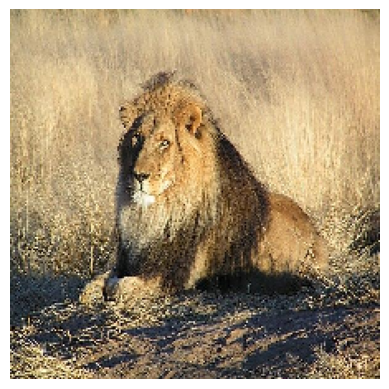

In [ ]:
# 이미지 로드 및 전처리
img = image.load_img('Lion_waiting_in_Namibia.jpg', target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

### 예측 및 결과 해석


In [ ]:
# 예측 수행
preds = mobilenet_pretrained.predict(x)

# 예측 결과 디코딩
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: [('n02129165', 'lion', 0.99907696), ('n02112137', 'chow', 0.00043173687), ('n02106030', 'collie', 0.00011996482)]


### 예측 결과
- 가장 높은 확률로 lion(사자)으로 분류되었습니다.

## 6.2 PyTorch에서의 전이 학습

### 필요한 라이브러리 import

In [ ]:
import torchvision.models as models
from torchvision import transforms
from PIL import Image

### 사전 학습된 MobileNet 모델 로드

> 참고: PyTorch에서는 MobileNet V1은 제공하지 않으며, 대신 MobileNet V2를 제공합니다.
>
> [torchvision.models](https://pytorch.org/vision/0.8/models.html?highlight=mobilenet)

### MobileNet V1과 V2의 차이점

- MobileNet V2는 V1의 개선판으로, **인버티드 잔차 블록(Inverted Residual Block)**과 선형 Bottleneck을 도입하여 성능과 효율성을 향상시켰습니다.
- V2에서는 ReLU6 대신 ReLU를 사용하고, 구조적인 변화로 인해 V1보다 더 높은 정확도와 효율성을 제공합니다.

[Why Relu? Tips for using Relu. Comparison between Relu, Leaky Relu, and Relu-6.](https://medium.com/@chinesh4/why-relu-tips-for-using-relu-comparison-between-relu-leaky-relu-and-relu-6-969359e48310)

In [ ]:
# 사전 학습된 MobileNet V2 모델 로드
mobilenet_pretrained = models.mobilenet_v2(pretrained=True)
mobilenet_pretrained.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

### 이미지 불러오기 및 전처리

In [ ]:
# 이미지 로드
img = Image.open('Lion_waiting_in_Namibia.jpg')

# 이미지 전처리
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet의 평균
        std=[0.229, 0.224, 0.225]    # ImageNet의 표준편차
    )
])

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

### 예측 및 결과 해석

In [ ]:
# 예측 수행
with torch.no_grad():
    out = mobilenet_pretrained(batch_t)

# ImageNet의 클래스 인덱스 로드
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

# 예측 결과 확인
probabilities = torch.nn.functional.softmax(out[0], dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5)

for i in range(top5_prob.size(0)):
    print(classes[top5_catid[i]], top5_prob[i].item())

--2024-10-27 13:39:40--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.1’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2024-10-27 13:39:40 (17.8 MB/s) - ‘imagenet_classes.txt.1’ saved [10472/10472]

lion 0.9990697503089905
collie 0.0006734962807968259
Shetland sheepdog 0.00013162917457520962
cheetah 7.421672489726916e-05
ram 8.218690709327348e-06


### 예측 결과

- 가장 높은 확률로 lion(사자)으로 분류되었습니다.

## 7. 결론

- 이번 강의에서는 MobileNet의 핵심 개념인 Depthwise Separable Convolution을 이해하고, 이를 TensorFlow와 PyTorch로 구현해보았습니다.
- Depthwise Separable Convolution을 통해 모델의 연산량과 파라미터 수를 크게 줄이면서도 정확도를 유지할 수 있음을 확인했습니다.
- ReLU6 활성화 함수와 Batch Normalization을 사용하여 모델의 학습 안정성과 효율성을 높였습니다.
- 또한, Width Multiplier와 Resolution Multiplier를 사용하여 모델의 크기와 연산량을 조절할 수 있음을 알게 되었습니다.
- 전이 학습을 통해 사전 학습된 MobileNet 모델을 불러와 사용하는 방법도 학습하여, 더욱 효율적으로 모델을 활용할 수 있습니다.

## 8. 과제

### 과제 1: MobileNet 모델 구조 타이핑 및 이해

### 목표

    - MobileNet 모델의 구조를 직접 타이핑해보면서 각 레이어가 어떻게 쌓이는지 연습해보세요.

## 방법

1. TensorFlow 또는 PyTorch를 선택하여 MobileNet 모델의 코드를 직접 타이핑해보세요.
2. 각 레이어의 역할과 파라미터 수를 주석으로 달아가며 이해를 돕습니다.
3. 모델의 summary를 출력하여 구조를 확인하고, 각 층의 출력 형태와 파라미터 수를 분석하세요.

### 과제 2: MobileNet에 대한 추가 조사 및 정리

### 목표
    - MobileNet에 대해 추가로 연구하고, 해당 모델에 대해 정리해보세요.

### 방법
    - MobileNet의 발전 과정에 대해 조사해보세요.
    - MobileNet의의 다양한 변형(v2~4)에 대해 알아보시고,노션 페이지에 공유해주세요.

### 과제 3: MobileNet을 사용한 이미지 분류 실습

### 목표

    - 사전 학습된 MobileNet 모델을 사용하여 자신만의 이미지를 분류해보세요.

### 방법

- TensorFlow 또는 PyTorch를 선택하여 사전 학습된 MobileNet 모델을 불러옵니다.
분류하고자 하는 이미지를 선택하여 전처리합니다.
- 모델을 사용하여 이미지를 분류하고, 예측 결과를 해석해보시고, 노션 페이지에 공유해주세요.


### Reference

- [Understanding Depthwise Separable Convolutions and the efficiency of MobileNets](https://towardsdatascience.com/understanding-depthwise-separable-convolutions-and-the-efficiency-of-mobilenets-6de3d6b62503)